# Distributions demo

This tutorial will show how to sample from a 1-dimensional Maxwell-Boltzmann distribution as well as the standard of code documentation that we expect throughout the course. Meeting these standards of code documentation will result in extra marks as well as making your code easier for both you and the TAs to read.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Maxwell-Boltzmann function

To sample from a distribution, we need to first take our probability distribution and turn it into a probability density function. This is done by making sure the probabilities under the function add up to unity. 

After we obtain the probability density function, we then need to be able to sample a random velocity from this function. We do this by taking the probability density function and cumalitively summing each probability as we step through our range until we get to 1. This is called the cumulative density function. We will have a function that, with increasing velocity on the x-axis, increases from 0 to 1 on the y-axis.

We can't sample from this directly as we now need to flip the axes so that we can randomly choose a value from 0 to 1 and obtain the corresponding velocity. We then sample from 0 to 1 on the x-axis and report the corresponding velocity from the y-axis. 

Sampling this function a lot, we will eventually approach the analytical solution for the original distribution.

In [8]:
def sample_maxwell_boltzmann_velocities(n, T):
    """
    This function draws n random sample velocities of protons in
    a pure helium gas of temperature T.
    
    Parameters
    ----------
    n: int
        n is the number of samples to draw from the distribution
    T: float
        T is the absolute temperature of the proton gas
    
    Returns
    -------
    v_inv: np.ndarray
        an array of randomly sampled velocities
    v_peak: float
        the expected peak velocity of the distribution
    """
    # Define some constants
    m = 1.673e-27 * 4 # approximate mass of a helium atom in kg
    k = 1.381e-23 # Boltzmann constant in J/K
    #calculate and print the expected peak velocity for this temperature
    v_peak = np.sqrt(((2*k*T)/m))
    print(f"Expected peak velocity is: {v_peak}")
    # n is the number of samples
    # T is the absolute temperature
    # Define a range of energies to evaluate the pdf and cdf
    v_min = 0 # minimum velocity in m/s
    v_max = 4000 # maximum velocity in m/s (arbitrary choice)
    n_step = 100000 # velocity steps (arbitrary choice)
    v_range = np.linspace(v_min, v_max, n_step) # array of velocities in m/s
    # Calculate the pdf of the maxwell-boltzmann distribution for each velocity
    pdf = (m/(2*np.pi*k*T))**1.5 * (4*np.pi*v_range**2) * np.exp(-(m*v_range**2)/(2*k*T))
    # Normalize the pdf to make it a probability density
    pdf = pdf / np.sum(pdf)
    # Calculate the cdf of the planck distribution by cumulatively summing the pdf
    cdf = np.cumsum(pdf)
    # Generate n random numbers from a uniform distribution between 0 and 1
    u = np.random.uniform(0, 1, size=n)
    # Interpolate the inverse cdf function using numpy.interp
    v_inv = np.interp(u, cdf, v_range)
    # Return the sampled energies array
    return v_inv, v_peak

Let's check that the function works.

In [9]:
#Usage example
n_samples = 5000 #number of samples to draw
T = 300 #absolute temperature of gas in Kelvin
velocities, v_peak = sample_maxwell_boltzmann_velocities(n_samples,T)
print(velocities)

Expected peak velocity is: 1112.7420453698023
[1957.84021725 1502.63086247 2088.7958153  ...  577.19125378 1299.26575191
  346.53630645]


The function seems to work correctly! Let's plot those results to properly verify.

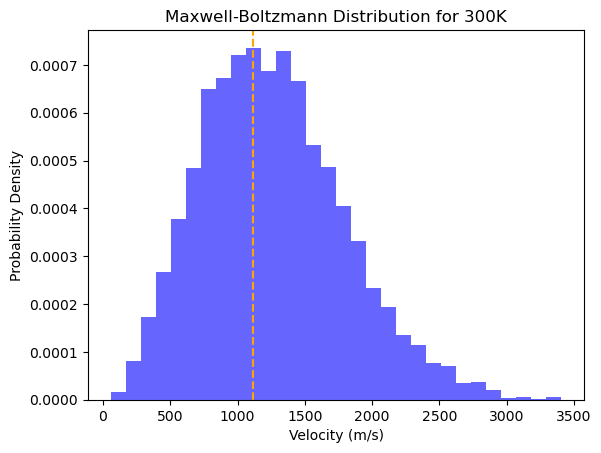

In [10]:
plt.hist(velocities, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(v_peak, c="orange", ls="--")
plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability Density')
plt.title(f'Maxwell-Boltzmann Distribution for {T}K')
plt.show()

We see the expected distribution of the Maxwell-boltzmann in 1d and it correctly peaks at the calculated peak velocity. 

Lets now do this for a range of temperatures.

Expected peak velocity is: 642.4419194328702
Expected peak velocity is: 1112.7420453698023
Expected peak velocity is: 1436.543803447341
Expected peak velocity is: 1699.7415506223685


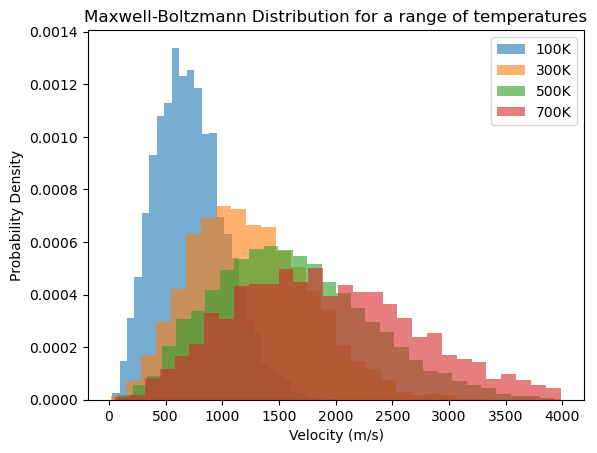

In [11]:
T_ranges = [100,300,500,700] #list of temperatures that we wish to draw from
n_samples = 5000 #number of samples to draw for each temperature

for T in T_ranges: #draw velocities for each temperature and plot them on the histogram
    velocities, v_peak = sample_maxwell_boltzmann_velocities(n_samples,T)
    plt.hist(velocities, bins=30, density=True, alpha=0.6, label=f"{T}K")

plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability Density')
plt.title('Maxwell-Boltzmann Distribution for a range of temperatures')
plt.legend()
plt.show()

Changing the number of samples we draw also affects the distribution we obtain - as we sample more and more, our plotted histogram approaches the analytical solution. If we were to sample an infinite amount of different points in the distribution, we would retrieve the analytical distribution. 

Of course, we can't sample infinity times due to it taking an infinite amount of computation time but we can get a good approximation with a large enough number of samples. Take this into consideration when you need to sample a distribution later in the course and especially in the final project!